In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
#Read the data
df=pd.read_csv('C:\\DataScienceProjects\\FakeNewsClassifier\\news.csv')

#Get shape
df.shape

(6335, 4)

In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
#DataFlair - Get the labels
y=df.label
y.head(8)

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
5    FAKE
6    FAKE
7    REAL
Name: label, dtype: object

In [5]:
#DataFlair - Split the dataset
x = df.text
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.25, random_state=7)

In [6]:
# Exploring the TF-IDF Vectorizerfrom sklearn.feature_extraction.text import TfidfVectorizer

# Example documents
documents = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?",
]

# Create a TfidfVectorizer object
tfidf_example_vectorizer = TfidfVectorizer()

# Fit the vectorizer to the documents and transform the documents into a TF-IDF matrix
tfidf_matrix = tfidf_example_vectorizer.fit_transform(documents)

# Print the TF-IDF matrix
print(tfidf_matrix.toarray())

# Get the feature names (terms)
print(tfidf_example_vectorizer.get_feature_names_out())


[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [7]:
# Print the TF-IDF matrix
print(tfidf_matrix.toarray())

# Get the feature names (terms)
print(tfidf_example_vectorizer.get_feature_names_out())


[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]
['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [8]:
# Create a TfidfVectorizer object specifying max_df
# Terms with higher TF-IDF scores are considered more significant or unique to the document, 
# as they appear frequently in the document but infrequently across the corpus.


# When max_df=0.5 is set in the context of TF-IDF vectorization, it means that terms (words) that occur in 
# more than 60% of the documents in the corpus will be ignored or not considered for TF-IDF calculation.

#  In other words, any term that occurs in more than 60% of the documents will be considered too common and will 
# be excluded from the vocabulary.
max_dfVectorizer = TfidfVectorizer(max_df=0.6)

# Fit the vectorizer to the documents and transform the documents into a TF-IDF matrix
tfidf_matrix = max_dfVectorizer.fit_transform(documents)

# Print the TF-IDF matrix
print(tfidf_matrix.toarray())

# Get the feature names (terms)
print(max_dfVectorizer.get_feature_names_out())

[[0.         1.         0.         0.         0.        ]
 [0.         0.         0.         1.         0.        ]
 [0.57735027 0.         0.57735027 0.         0.57735027]
 [0.         1.         0.         0.         0.        ]]
['and' 'first' 'one' 'second' 'third']


In [9]:
# Create a TfidfVectorizer object specifying stop words
sw_vectorizer = TfidfVectorizer(stop_words='english')

# Fit the vectorizer to the documents and transform the documents into a TF-IDF matrix
tfidf_matrix = sw_vectorizer.fit_transform(documents)

# Print the TF-IDF matrix
print(tfidf_matrix.toarray())

# Get the feature names (terms)
print(sw_vectorizer.get_feature_names_out())

[[1.         0.        ]
 [0.78722298 0.61666846]
 [0.         0.        ]
 [1.         0.        ]]
['document' 'second']


In [10]:
# Create a TfidfVectorizer object specifying stop words and max_df
tfidf_example_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.55)

# Fit the vectorizer to the documents and transform the documents into a TF-IDF matrix
tfidf_matrix = tfidf_example_vectorizer2.fit_transform(documents)

# Print the TF-IDF matrix
print(tfidf_matrix.toarray())

# Get the feature names (terms)
print(tfidf_example_vectorizer2.get_feature_names_out())

[[0.]
 [1.]
 [0.]
 [0.]]
['second']


In [11]:
# For the Fake News Dataset
#Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [12]:
# Print the TF-IDF matrix for training dataset
print(tfidf_train.toarray())

# Get the feature names (terms)
print(tfidf_vectorizer.get_feature_names_out())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01146018 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
['00' '000' '0000' ... 'هذا' 'والمرضى' 'ยงade']


In [13]:
# Print the TF-IDF matrix for test dataset
print(tfidf_test.toarray())

# Get the feature names (terms)
print(tfidf_vectorizer.get_feature_names_out())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['00' '000' '0000' ... 'هذا' 'والمرضى' 'ยงade']


In [14]:
#Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)


PassiveAggressiveClassifier(max_iter=50)

In [15]:
# To incorporate additional training data without retraining the model on the data it has already seen, 
# you can use the partial_fit() method available in the PassiveAggressiveClassifier.

# pac.partial_fit(x_remaining_training_data, y_remaining_training_data)

In [16]:
#Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.74%


In [17]:
#Build confusion matrix

labels=['FAKE','REAL']
c_m = confusion_matrix(y_test,y_pred, labels = labels)

print("Confusion Matrix:")
print(c_m)

c_m[labels.index('FAKE')]

Confusion Matrix:
[[752  56]
 [ 59 717]]


array([752,  56], dtype=int64)

In [18]:
c_m[labels.index('FAKE')][labels.index('FAKE')]

752

In [19]:
c_m[labels.index('REAL')][labels.index('FAKE')]

59

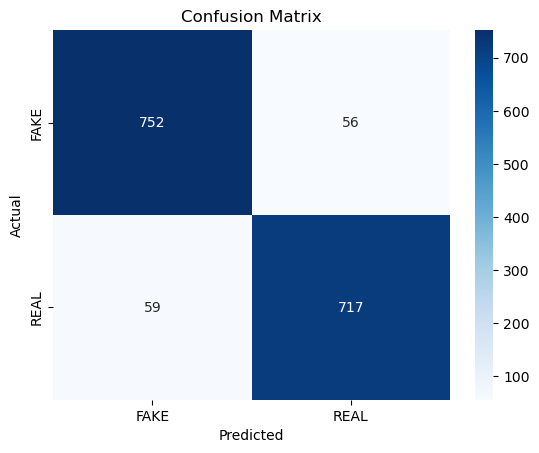

In [20]:
sn.heatmap(c_m, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()